In [14]:
import torch
import matplotlib.pyplot as plt

In [15]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

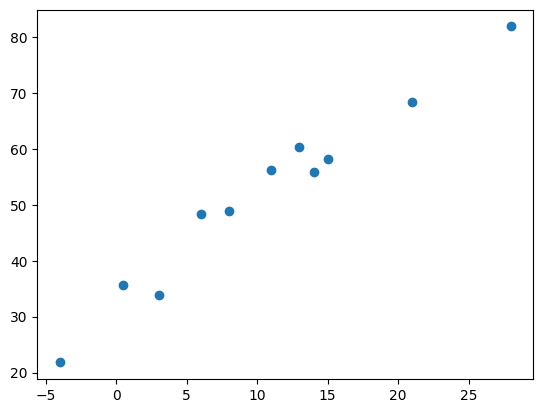

In [16]:
plt.scatter(t_c, t_u)

In [17]:
w = torch.rand([])
b = torch.rand([])

In [18]:
def model(x, w, b):
    return w*x + b

In [19]:
def loss_fn(y_pred, y):
    return torch.mean((y - y_pred)**2)

In [20]:
lr = 4e-3
delta = 0.001
epochs = 3_000

In [21]:
for epoch in range(epochs):

    loss_rate_of_chance_w = (loss_fn(model(t_c, w+delta, b), t_u) - loss_fn(model(t_c, w-delta, b), t_u)) / (2*delta)
    loss_rate_of_chance_b = (loss_fn(model(t_c, w, b+delta), t_u) - loss_fn(model(t_c, w, b-delta), t_u)) / (2*delta)
    
    w = w - lr*loss_rate_of_chance_w
    b = b - lr*loss_rate_of_chance_b

    y_pred = model(t_c, w, b)
    loss = loss_fn(y_pred, t_u)

    if (epoch+1)%300 == 0:
        print(f'epoch: {epoch+1}\tloss: {loss}')


epoch: 300	loss: 68.74988555908203
epoch: 600	loss: 17.984525680541992
epoch: 900	loss: 10.918170928955078
epoch: 1200	loss: 9.934483528137207
epoch: 1500	loss: 9.797542572021484
epoch: 1800	loss: 9.778481483459473
epoch: 2100	loss: 9.775832176208496
epoch: 2400	loss: 9.775461196899414
epoch: 2700	loss: 9.775412559509277
epoch: 3000	loss: 9.775402069091797


In [22]:
w

tensor(1.7924)

In [23]:
b

tensor(32.9794)

In [24]:
y_pred = model(t_c, w, b)
y_pred

tensor([33.8756, 58.0728, 59.8652, 83.1662, 52.6957, 47.3185, 38.3566, 25.8099,
        43.7337, 56.2804, 70.6195])

In [25]:
y_real = t_u
y_real

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [26]:
loss = loss_fn(y_pred, y_real)
loss

tensor(9.7754)